In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

np.random.seed(2023)

In [2]:
size = 50
X = np.random.normal(0, 1, size = size)
lim = np.abs(X).max() + 0.2
xs = np.arange(1000) / 500 * lim - lim

In [3]:
M = 10
grid = np.arange(M) / M * 2 * lim - lim + 0.25

In [4]:
from theoretical_experiment.visual_tools import colors

In [5]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [6]:
plt.style.use('seaborn-v0_8-white')
# plt.style.use('classic')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


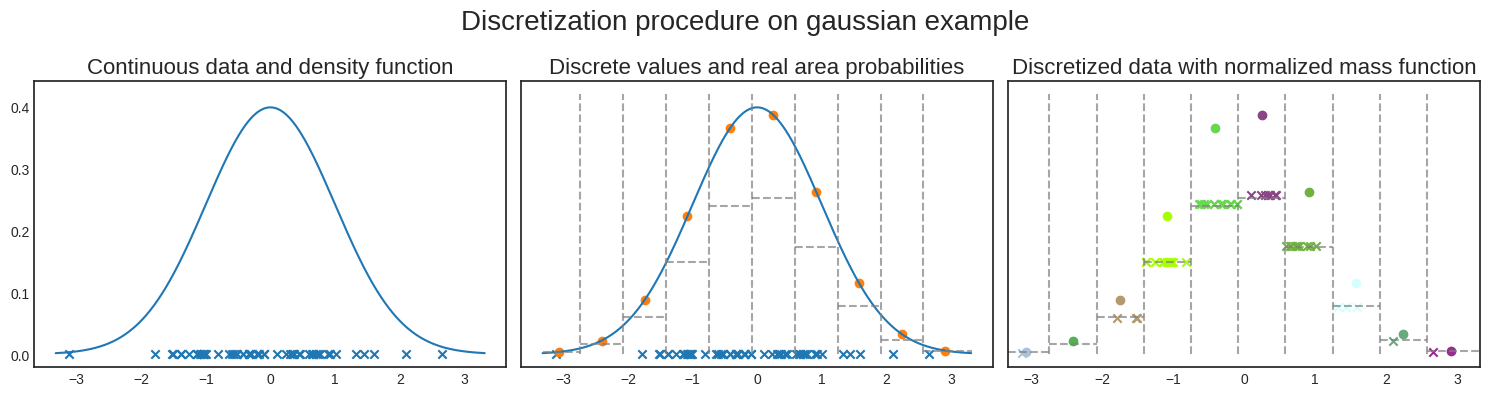

In [7]:
fig, ax = plt.subplots(1, 3, sharey=True, figsize=(15, 4))
plt.xlim([-lim, lim])

ax[0].scatter(X, np.zeros(size), marker='x')
ax[0].plot(xs, stats.norm.pdf(xs))
ax[0].title.set_text('Continuous data and density function')
ax[0].title.set_size(16)

cdfs = [0, *[stats.norm.cdf((grid[i] + grid[i+1])/2) for i in range(len(grid)-1)], 1]
ax[1].scatter(X, np.zeros(size), marker='x')
ax[1].plot(xs, stats.norm.pdf(xs))
ax[1].scatter(grid, stats.norm.pdf(grid))
# ax[1].xlim([-lim, lim])
xmin, xmax = -lim, (grid[0] + grid[1]) / 2
for i in range(len(grid) - 1):
    ax[1].vlines([(grid[i] + grid[i+1]) / 2], 0, 0.42, linestyles='--', color='grey', alpha = 0.7)
    ax[1].hlines([cdfs[i+1] - cdfs[i]], xmin, xmax, linestyles='--', color='grey', alpha = 0.7)
    if i < len(grid) - 2:
        xmin, xmax = xmax, (grid[i+1] + grid[i+2]) / 2
    else:
        xmin, xmax = xmax, lim
ax[1].hlines(cdfs[-1] - cdfs[-2], xmin, xmax, linestyles='--', color='grey', alpha = 0.7)
ax[1].title.set_text('Discrete values and real area probabilities')
ax[1].title.set_size(16)

xmin, xmax = -lim, (grid[0] + grid[1]) / 2
normalizer = stats.norm.pdf(grid).sum()
for i in range(len(grid)):
    ax[2].hlines([cdfs[i+1] - cdfs[i]], xmin, xmax, linestyles='--', color='grey', alpha = 0.7)
    indicators  = np.all(np.concatenate([(X < xmax).reshape(-1, 1),  (X >= xmin).reshape(-1, 1)], axis=1), axis=1)
    ax[2].scatter(X[indicators], np.ones(indicators.sum()) * stats.norm.pdf(grid[i]) / normalizer, marker='x', color=colors[i])
    ax[2].scatter(grid[i], stats.norm.pdf(grid[i]), color=colors[i])
    if i < len(grid) - 1:
        ax[2].vlines([(grid[i] + grid[i+1]) / 2], 0, 0.42, linestyles='--', color='grey', alpha = 0.7)
    if i < len(grid) - 2:
        xmin, xmax = xmax, (grid[i+1] + grid[i+2]) / 2
    else:
        xmin, xmax = xmax, lim
ax[2].title.set_text('Discretized data with normalized mass function')
ax[2].title.set_size(16)

plt.suptitle('Discretization procedure on gaussian example', size=20)
plt.tight_layout()
plt.savefig('chapter4/discretization_image.eps', format='eps')
plt.show()

# Estimation of $\pi$

In [8]:
from scipy.stats import qmc
import numpy as np

sample_size = 10

sobol = qmc.Sobol(2).random(sample_size)
halton = qmc.Halton(2).random(sample_size)
latin = qmc.LatinHypercube(2).random(sample_size)
uniform = np.random.uniform(size=(sample_size, 2))

/tmp/ipykernel_49932/3450891216.py:6: UserWarning: The balance properties of Sobol' points require n to be a power of 2.
  sobol = qmc.Sobol(2).random(sample_size)


In [9]:
def estimate_pi_2d(x):
    return (x[:, 0] ** 2 + x[:, 1] ** 2 <= 1).mean() * 4 

def estimate_pi_1d(x):
    return (np.sqrt(1 - x**2)).mean() * 4 

In [10]:
print(estimate_pi_2d(sobol))
print(estimate_pi_2d(halton))
print(estimate_pi_2d(latin))
print(estimate_pi_2d(uniform))

print(estimate_pi_1d(sobol))
print(estimate_pi_1d(halton))
print(estimate_pi_1d(latin))
print(estimate_pi_1d(uniform))

2.4
2.8
2.8
3.6
3.0139806229629524
2.988045851723458
3.097309108523248
3.1175413689430167


## 1D

In [11]:
sample_size = 64

sobol_res = []
halton_res = []
latin_res = []
uniform_res = []
grid_res = []

np.random.seed(2023)

for i in range(100):
    sobol = qmc.Sobol(1).random(sample_size)
    halton = qmc.Halton(1).random(sample_size)
    latin = qmc.LatinHypercube(1).random(sample_size)
    uniform = np.random.uniform(size=(sample_size, 1))
    # grid = np.concatenate([np.concatenate([(np.arange(int(np.sqrt(sample_size))) + 0.5) / int(np.sqrt(sample_size)) for i in range(int(np.sqrt(sample_size)))]).reshape(-1, 1), np.concatenate([(np.ones(int(np.sqrt(sample_size))) * i + 0.5) / int(np.sqrt(sample_size)) for i in range(int(np.sqrt(sample_size)))]).reshape(-1, 1)], axis=1)
    grid = np.arange(sample_size) / (sample_size - 1)
    
    sobol_res.append(estimate_pi_1d(sobol))
    halton_res.append(estimate_pi_1d(halton))
    latin_res.append(estimate_pi_1d(latin))
    uniform_res.append(estimate_pi_1d(uniform))
    grid_res.append(estimate_pi_1d(grid))

In [12]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

In [13]:
results = pd.DataFrame({'QS': sobol_res, 'QH': halton_res, 'LH': latin_res, 'RU': uniform_res, 'OG': grid_res, }
                    ).melt(None, None, 'sample', 'value')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


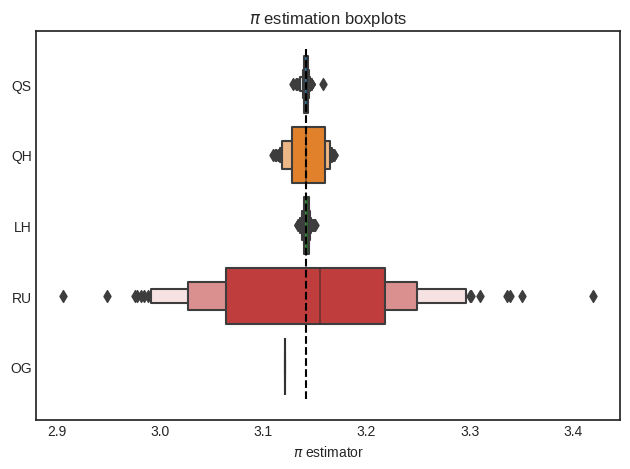

In [14]:
sns.boxenplot(results, x='value', y='sample')
plt.ylabel('')
plt.vlines(np.pi, -.5, 4.5, colors=['black'], linestyles='--')
plt.xlabel('$\pi$ estimator')
plt.title('$\pi$ estimation boxplots')
plt.tight_layout()
plt.savefig('chapter4/pi_example_1d.eps', format='eps')
plt.show()

In [15]:

    
def plot_circle1(x, technique, dim=1):
    plt.figure(figsize=(4, 4))
    plt.vlines(x, 0, np.sqrt(1 - x**2))
    plt.plot(np.arange(1000) / 1000, np.sqrt(1 - (np.arange(1000) / 1000)**2))
    plt.title(f'Estimate $\pi$ with {dim}D points from {technique}')
    plt.savefig(f'chapter4/{technique}_{dim}D_circle.eps', format='eps')
    plt.show() 
    
def plot_circle2(x, technique,  dim=2):
    plt.figure(figsize=(4, 4))
    plt.scatter(x[:, 0], x[:, 1], color=['blue' if x[i, 0]**2 + x[i, 1] ** 2 <= 1 else 'grey' for i in range(x.shape[0])])
    plt.plot(np.arange(1000) / 1000, np.sqrt(1 - (np.arange(1000) / 1000)**2))
    plt.title(f'Estimate $\pi$ with {dim}D points from {technique}')
    plt.savefig(f'chapter4/{technique}_{dim}D_circle.eps', format='eps')
    plt.show()

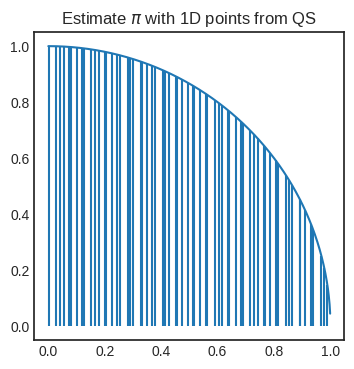

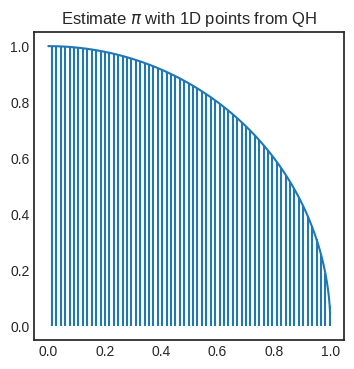

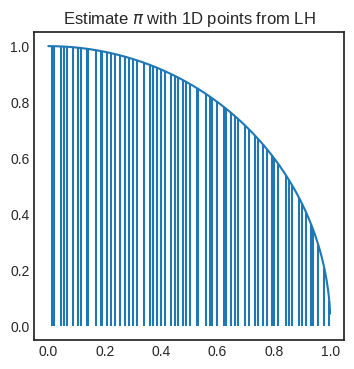

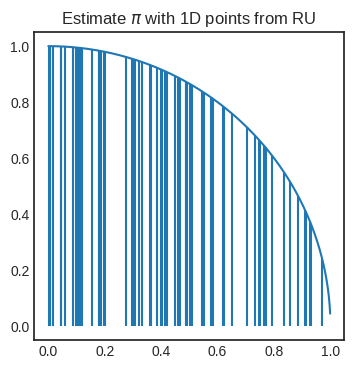

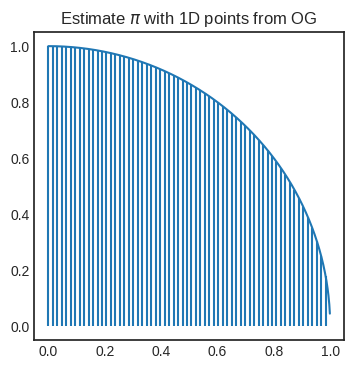

In [16]:
plot_circle1(sobol, 'QS')
plot_circle1(halton, 'QH')
plot_circle1(latin, 'LH')
plot_circle1(uniform, 'RU')
plot_circle1(grid, 'OG')

# technique = 'Integrate 1D Grid'
# plt.figure(figsize=(4, 4))
# plt.vlines(grid_1D[:, 0], 0,  grid_1D[:, 1])
# plt.plot(np.arange(1000) / 1000, np.sqrt(1 - (np.arange(1000) / 1000)**2))
# plt.title(f'Estimate $\pi$ with points from {technique}')
# plt.savefig(f'chapter4/{technique}_circle.eps', format='eps')
# plt.show() 
# 
# technique = 'Integrate 1D Unifrom'
# plt.figure(figsize=(4, 4))
# plt.vlines(uniform_1D[:, 0], 0,  uniform_1D[:, 1])
# plt.plot(np.arange(1000) / 1000, np.sqrt(1 - (np.arange(1000) / 1000)**2))
# plt.title(f'Estimate $\pi$ with points from {technique}')
# plt.savefig(f'chapter4/{technique}_circle.eps', format='eps')
# plt.show() 

## 2D

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


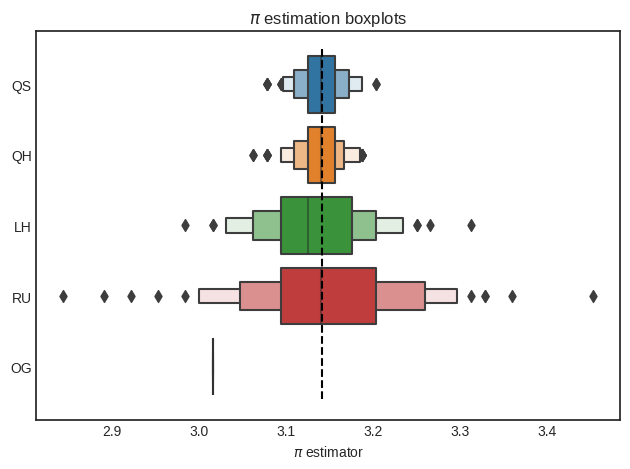

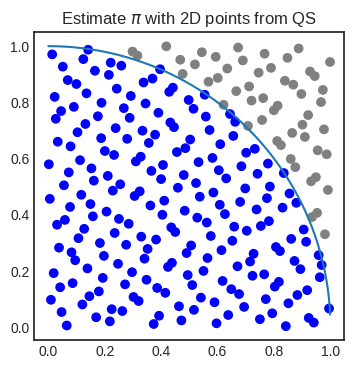

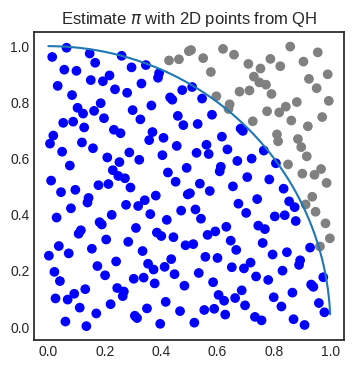

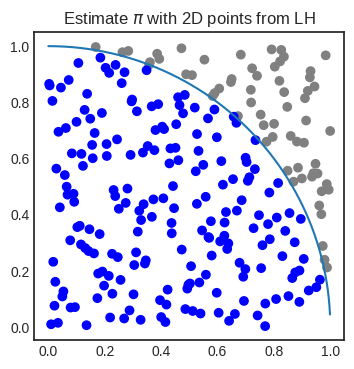

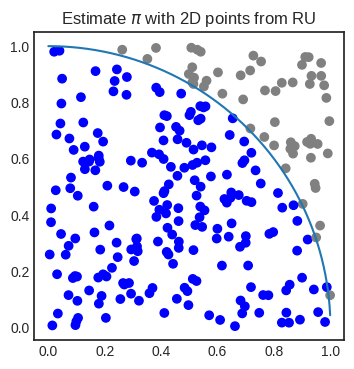

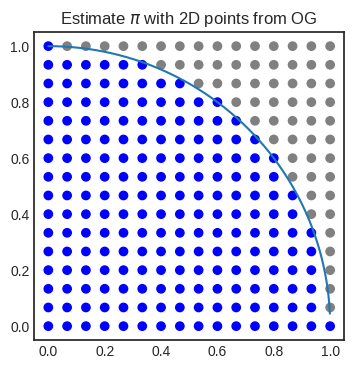

In [17]:
sample_size = 256

sobol_res = []
halton_res = []
latin_res = []
uniform_res = []
grid_res = []

np.random.seed(2023)

for i in range(100):
    sobol = qmc.Sobol(2).random(sample_size)
    halton = qmc.Halton(2).random(sample_size)
    latin = qmc.LatinHypercube(2).random(sample_size)
    uniform = np.random.uniform(size=(sample_size, 2))
    grid = np.concatenate([np.concatenate([(np.arange(int(np.sqrt(sample_size)))) / int(np.sqrt(sample_size) - 1) for i in range(int(np.sqrt(sample_size)))]).reshape(-1, 1), np.concatenate([(np.ones(int(np.sqrt(sample_size))) * i) / int(np.sqrt(sample_size) -  1) for i in range(int(np.sqrt(sample_size)))]).reshape(-1, 1)], axis=1)
    # grid = np.arange(sample_size) / (sample_size - 1)

    sobol_res.append(estimate_pi_2d(sobol))
    halton_res.append(estimate_pi_2d(halton))
    latin_res.append(estimate_pi_2d(latin))
    uniform_res.append(estimate_pi_2d(uniform))
    grid_res.append(estimate_pi_2d(grid))

results = pd.DataFrame({'QS': sobol_res, 'QH': halton_res, 'LH': latin_res, 'RU': uniform_res, 'OG': grid_res, }
                       ).melt(None, None, 'sample', 'value')

sns.boxenplot(results, x='value', y='sample')
plt.ylabel('')
plt.vlines(np.pi, -.5, 4.5, colors=['black'], linestyles='--')
plt.xlabel('$\pi$ estimator')
plt.title('$\pi$ estimation boxplots')
plt.tight_layout()
plt.savefig('chapter4/pi_example_2d.eps', format='eps')
plt.show()


def plot_circle(x, technique,  dim=2):
    plt.figure(figsize=(4, 4))
    plt.scatter(x[:, 0], x[:, 1], color=['blue' if x[i, 0]**2 + x[i, 1] ** 2 <= 1 else 'grey' for i in range(x.shape[0])])
    plt.plot(np.arange(1000) / 1000, np.sqrt(1 - (np.arange(1000) / 1000)**2))
    plt.title(f'Estimate $\pi$ with {dim}D points from {technique}')
    plt.savefig(f'chapter4/{technique}_{dim}D_circle.eps', format='eps')
    plt.show()


plot_circle(sobol, 'QS')
plot_circle(halton, 'QH')
plot_circle(latin, 'LH')
plot_circle(uniform, 'RU')
plot_circle(grid, 'OG')

# Gaussian HMM - discretization example

In [18]:
import numpy as np
from hmmlearn import hmm
import array_to_latex as a2l
from ssm.plots import gradient_cmap, white_to_color_cmap
import matplotlib.pyplot as plt
import seaborn as sns
import urllib
import scipy
from theoretical_experiment.visual_tools import colors

In [19]:
PROJECT_PATH = ".."

import numpy as np
import pandas as pd
import scipy
import seaborn as sns
import json
import datetime
from tqdm import tqdm
import itertools
from scipy.stats import multivariate_normal

from ssm.util import find_permutation
from pathlib import Path
from hmmlearn import hmm

from theoretical_experiment.visual_tools import plot_HMM, plot_Qs, plot_metric

In [20]:
from torchHMM.utils.utils import total_variance_dist
from torchHMM.model.GaussianHMM import DiscreteHMM, DISCRETIZATION_TECHNIQUES, HmmOptim

LEARNING_ALGORITHMS = ["em", "cooc"]
T = 10000
np.random.seed(2023)


def init_true_model():
    true_model = hmm.GaussianHMM(n_components=3, covariance_type="full")

    true_model.startprob_ = np.array([0.6, 0.3, 0.1])
    true_model.transmat_ = np.array([[0.7, 0.2, 0.1], [0.3, 0.5, 0.2], [0.3, 0.3, 0.4]])

    true_model.means_ = np.array([[0.0, 0.0], [3.0, -3.0], [4.0, 3.0]])
    true_model.covars_ = (
        np.array(
            [
                [[1, -0.5], [-0.5, 1.2]],
                [[0.6, -0.5], [-0.5, 1.2]],
                [[1.5, 0.5], [0.5, 2.2]],
            ]
        )
        * 0.8
    )

    true_model.n_features = 2

    norm1 = multivariate_normal(true_model.means_[0], true_model.covars_[0])
    norm2 = multivariate_normal(true_model.means_[1], true_model.covars_[1])
    norm3 = multivariate_normal(true_model.means_[2], true_model.covars_[2])
    norms = [norm1, norm2, norm3]

    return true_model, norms


def Q_from_params(model_):
    """
    Calculate Q from model parameters
    """
    S_ = model_.transmat_ * model_.startprob_[:, np.newaxis]
    distributions_ = [
        scipy.stats.multivariate_normal(model_.means_[i], model_.covars_[i])
        for i in range(model_.n_components)
    ]

    B_ = np.concatenate(
        [dist.pdf(model_.nodes.T).reshape(1, -1) for dist in distributions_],
        axis=0,
    )
    B_ = B_ / B_.sum(1)[:, np.newaxis]
    return B_.T @ S_ @ B_


def init_model_with_params(discretize_meth, true_model_, X_train_, n):
    """
    Init DiscreteHMM with parameters from true model
    """
    model_ = DiscreteHMM(
        discretize_meth,
        n,
        n_components=3,
        learning_alg="cooc",
        verbose=True,
        params="mct",
        init_params="",
        optim_params=dict(max_epoch=50000, lr=0.1, weight_decay=0),
        n_iter=100,
    )

    model_.startprob_ = true_model_.startprob_
    model_.transmat_ = true_model_.transmat_
    model_.means_ = true_model_.means_
    model_.covars_ = true_model_.covars_

    model_._init(X_train_)
    model_.provide_nodes(X_train_, False)
    return model_


def list_grid_size(n_=3):
    return [
        10,
        int(np.ceil(0.5 * n_ * (1 + (2 * n_ - 1)**2))),
        50,
        int(np.ceil(np.sqrt(0.5 * n_ * (1 + (2 * n_ - 1)**2) * np.sqrt(T * n_ + 3**2)))),
        100,
        int(np.ceil(np.sqrt(T * n_ + n_**2))),
        250,
    ]


def kl_divergence(p_, q_):
    p = p_.reshape(-1) + 1e-10
    p /= p.sum()
    q = q_.reshape(-1) + 1e-10
    q /= q.sum()
    return np.sum(p * np.log2(p / q))


def accuracy(Z_hat, Z_):
    perm = find_permutation(np.concatenate([Z_hat, np.arange(max(Z_))]),
                            np.concatenate([Z_, np.arange(max(Z_))]))
    return (perm[Z_hat] == Z_).mean()

def score_model(model_, X_, Z_, Q_gt, info):
    ll = model.score(X_)
    acc = accuracy(model_.predict(X_), Z_)
    if Q_gt is not None:
        Q = Q_from_params(model_)
        kl = kl_divergence(Q, Q_gt)
        d_tv = total_variance_dist(Q, Q_gt)
    else:
        kl = None
        d_tv = None
    return {'kl': kl, 'll': ll, 'acc': acc, 'd_tv': d_tv, **info}

results_path = f"{PROJECT_PATH}/theoretical_experiment/1_results"
Path(results_path).mkdir(exist_ok=True, parents=True)
grid_sizes = list_grid_size()


In [21]:
T = 100
true_model, _ = init_true_model()
X, Z = true_model.sample(T)

In [22]:
n=16

In [23]:
title_strings = {'grid': 'OG',
                                     'random': 'RO',
                                     'latin_cube_u':  'LH',
                                     'latin_cube_q': 'LH_q',
                                     'sobol': 'QS',
                 'uniform':'RU',
                                     'halton': 'QH'}

In [24]:
[colors[0]]

[(0.6745098039215687, 0.7607843137254902, 0.8509803921568627)]

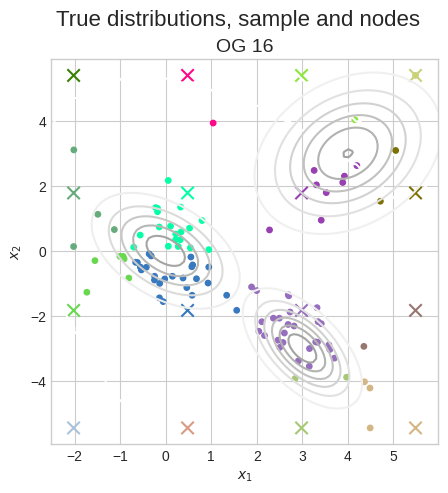

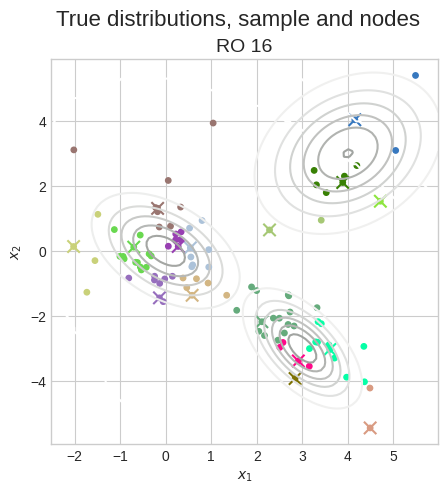

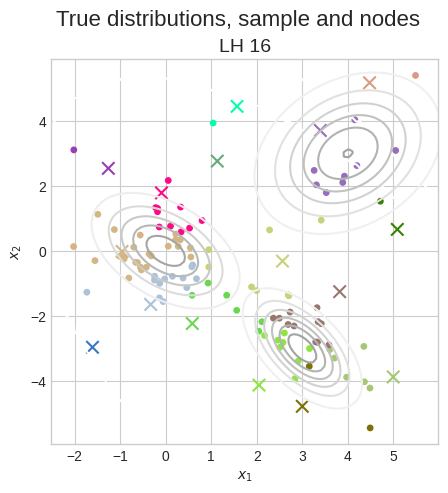

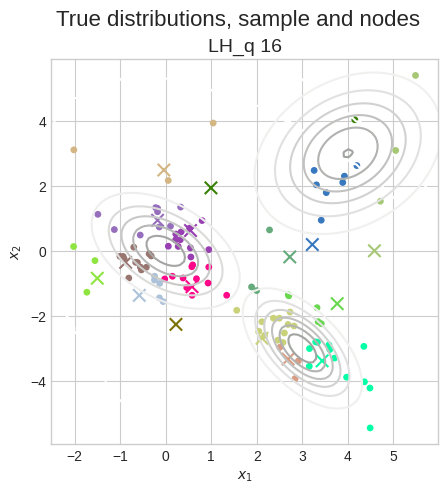

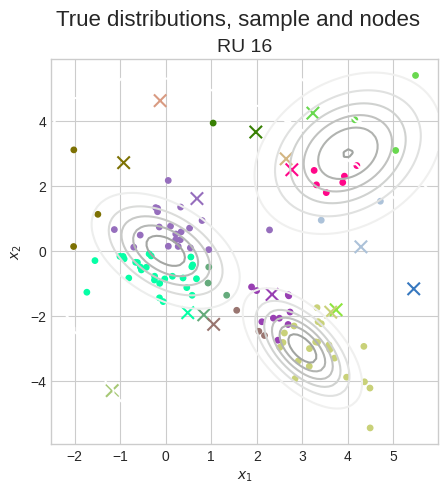

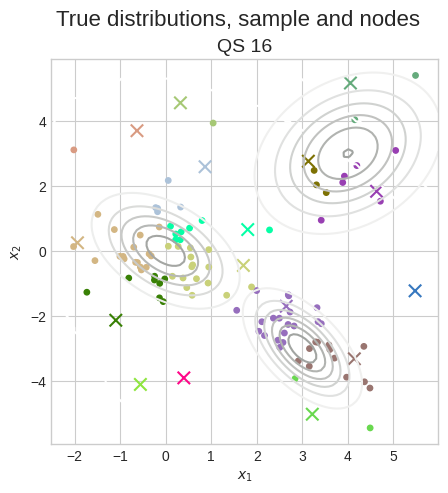

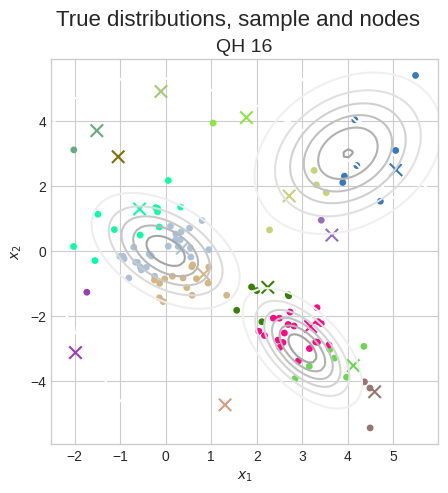

In [25]:
from collections import defaultdict as dd
res = dd(list)
plt.style.use('seaborn-v0_8-whitegrid')
np.random.seed(2023)
for discretize_meth in DISCRETIZATION_TECHNIQUES:
    for _ in range(100):
        # print(discretize_meth)
        model = init_model_with_params(discretize_meth, true_model, X, n)
        Xd = model.discretize(X, np.array([X.shape[0]]))
        Xd_c = model.nodes[:,  Xd.reshape(-1)].T
        res[discretize_meth].append(true_model.score(Xd_c, np.array([X.shape[0]])))
    
    """
    Plot emission distribution and nodes
    """
    norm1 = multivariate_normal(model.means_[0], model.covars_[0])
    norm2 = multivariate_normal(model.means_[1], model.covars_[1])
    norm3 = multivariate_normal(model.means_[2], model.covars_[2])
    norms = [norm1, norm2, norm3]
    
    x1, y1 = X.min(axis=0) - .5
    x2, y2 = X.max(axis=0) + .5
    
    XX, YY = np.meshgrid(np.linspace(x1, x2, 100), np.linspace(y1, y2, 100))
    data = np.column_stack((XX.ravel(), YY.ravel()))
    lls = np.concatenate([norm.pdf(data).reshape(-1, 1) for norm in norms], axis=1)
    
    plt.figure(figsize=(5, 5))
    for k in range(model.n_components):
        plt.contour(XX, YY, np.exp(lls[:, k]).reshape(XX.shape), cmap=white_to_color_cmap(sns.xkcd_palette(['grey'])[0]), levels=6)
        
    plt.scatter(model.nodes[0], model.nodes[1], marker='x', s=80, color=[colors[i*4] for i in range(model.no_nodes)])
    plt.scatter(X[:, 0], X[:,  1],  marker='o', s=15, color=[colors[i*4] for i in Xd.reshape(-1)],  alpha=1)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$")
    plt.suptitle("True distributions, sample and nodes", size=16)
    if discretize_meth in title_strings.keys():
        plt.title(f"{title_strings[discretize_meth]} {n}", size=14)
    else:
        plt.title(f"{discretize_meth} {n}", size=14)
    plt.savefig(f'chapter4/gaussianHmm_discrete_example_{discretize_meth}.eps', format='eps')
    plt.show()
    plt.close()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


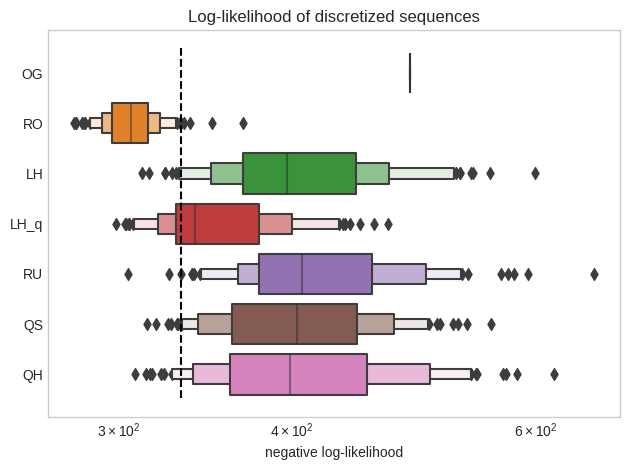

In [26]:
results = (pd.DataFrame(res).rename(title_strings,  axis=1) * -1).melt(None, None, 'sample', 'value')
sns.boxenplot(results, x='value', y='sample')
plt.ylabel('')
plt.vlines(true_model.score(X)* (-1), -.5, 6.5, colors=['black'], linestyles='--')
plt.xlabel('negative log-likelihood')
plt.title('Log-likelihood of discretized sequences')
plt.xscale('log')
plt.tight_layout()
plt.savefig('chapter4/gaussianHMM_example.eps', format='eps')
plt.show()

## 10D

In [27]:
from sklearn.decomposition import PCA
from collections import defaultdict as dd

In [28]:
np.random.seed(2023)

means = [np.random.uniform(size=10)[np.newaxis, ] * 10 - 5 for _ in range(3)]
def LU(a):
    b = np.tril(a)
    return b.T @ b
covars = [LU(np.random.uniform(size=(10,  10)) + 0.1)[np.newaxis, ] for _ in range(3)]

print(means)

print(covars)

def init_true_model():
    true_model = hmm.GaussianHMM(n_components=3, covariance_type="full")

    true_model.startprob_ = np.array([0.6, 0.3, 0.1])
    true_model.transmat_ = np.array([[0.7, 0.2, 0.1], [0.3, 0.5, 0.2], [0.3, 0.3, 0.4]])

    true_model.means_ = np.concatenate(means)
    true_model.covars_ = np.concatenate(covars)

    true_model.n_features = 10

    norm1 = multivariate_normal(true_model.means_[0], true_model.covars_[0])
    norm2 = multivariate_normal(true_model.means_[1], true_model.covars_[1])
    norm3 = multivariate_normal(true_model.means_[2], true_model.covars_[2])
    norms = [norm1, norm2, norm3]

    return true_model, norms

T = 2000
true_model, _ = init_true_model()
X, Z = true_model.sample(T)

pca = PCA(2).fit(X)

X2 = pca.transform(X)

n = 2 ** 8

title_strings = {'grid': 'OG',
                 'random': 'RO',
                 'latin_cube_u': 'LH',
                 'latin_cube_q': 'LH_q',
                 'sobol': 'QS',
                 'uniform': 'RU',
                 'halton': 'QH'}

res = dd(list)
plt.style.use('seaborn-v0_8-whitegrid')
np.random.seed(2023)

norm1 = multivariate_normal(true_model.means_[0], true_model.covars_[0])
norm2 = multivariate_normal(true_model.means_[1], true_model.covars_[1])
norm3 = multivariate_normal(true_model.means_[2], true_model.covars_[2])
norms = [norm1, norm2, norm3]

x1, y1 = X2.min(axis=0) - .5
x2, y2 = X2.max(axis=0) + .5

XX, YY = np.meshgrid(np.linspace(x1, x2, 100), np.linspace(y1, y2, 100))
data = np.column_stack((XX.ravel(), YY.ravel()))
lls = np.concatenate([norm.pdf(pca.inverse_transform(data)).reshape(-1, 1) for norm in norms], axis=1)

[array([[-1.78011696,  3.90422452,  0.88052255, -3.73403906, -3.58658777,
        -0.32104408, -4.77910338,  2.27274713,  0.24387342,  0.44935239]]), array([[-0.4362674 ,  0.01382265, -1.05531447, -3.48827697, -1.39124823,
        -3.37922993, -1.62041307, -3.19676719, -1.09008599, -4.6435179 ]]), array([[ 0.64861649, -2.96538508, -1.79395542, -1.23436217, -3.15945858,
        -3.96048164, -0.45072775, -3.04136163, -1.21474577,  4.30531959]])]
[array([[[4.65148629, 3.3332712 , 2.43184364, 2.97655835, 2.83982891,
         1.83089951, 1.34274416, 1.11962767, 0.31238647, 0.55598797],
        [3.3332712 , 3.65852419, 2.63195308, 2.61187391, 2.20322909,
         1.26962053, 1.04361741, 0.50327227, 0.09907781, 0.13489643],
        [2.43184364, 2.63195308, 3.25210672, 2.09257479, 2.31540866,
         2.13837897, 1.54386497, 1.18479522, 0.29978959, 0.34905964],
        [2.97655835, 2.61187391, 2.09257479, 3.12862766, 2.18851713,
         2.02968444, 1.40767292, 0.95192096, 0.27917925, 0.416657

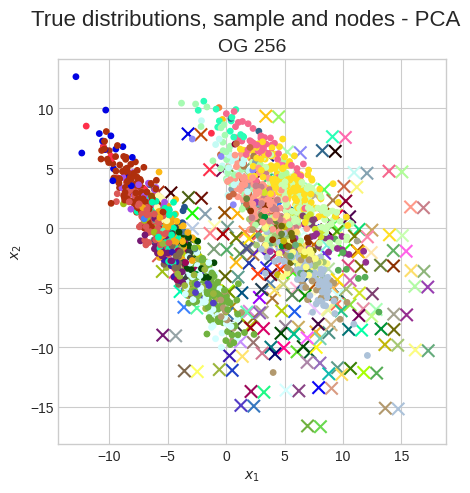

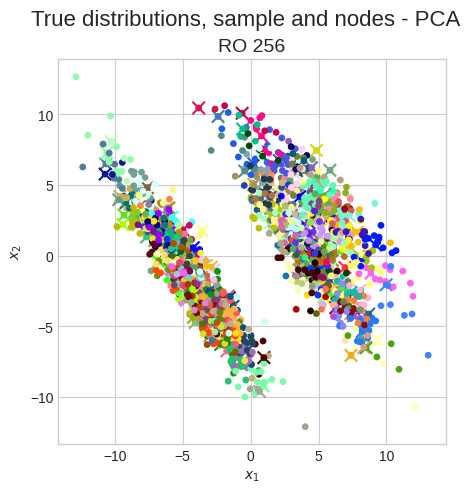

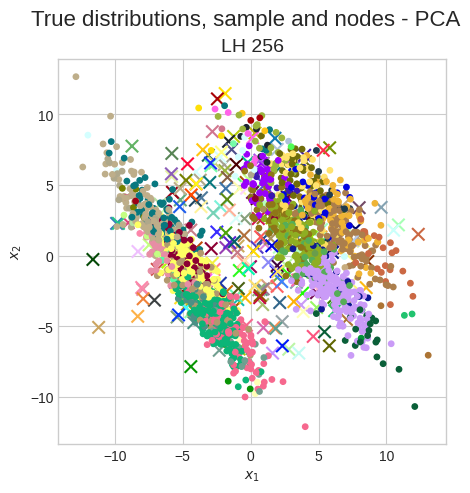

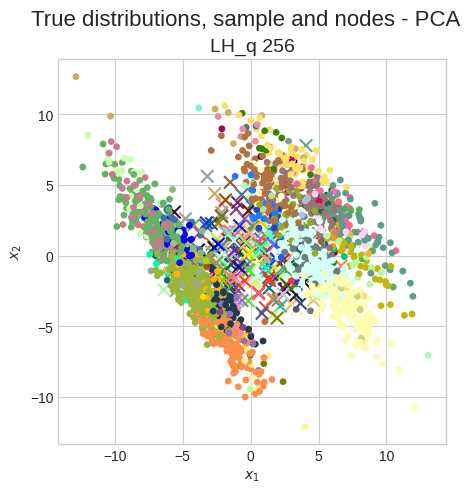

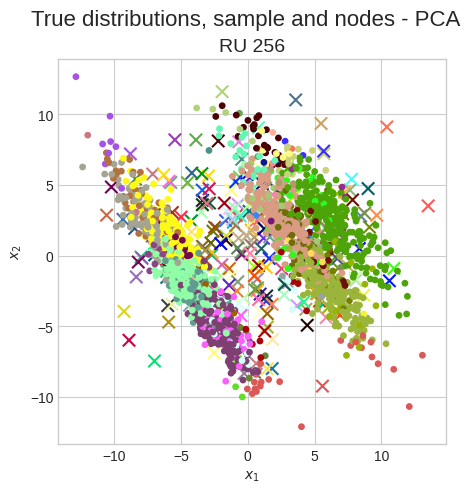

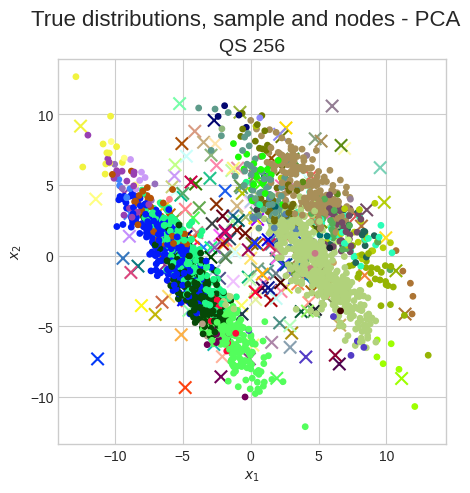

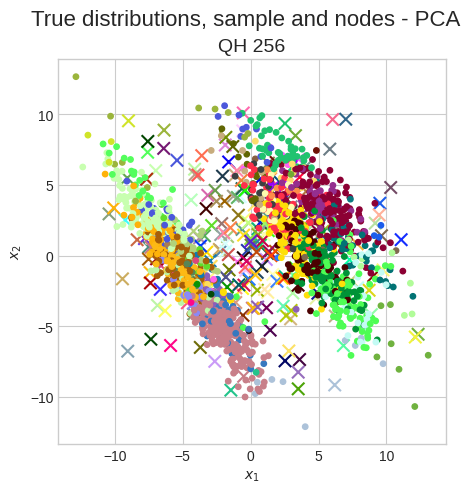

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


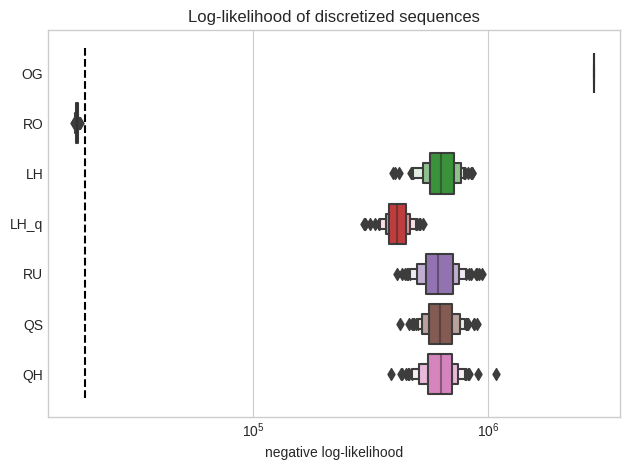

In [29]:

res = dd(list)
    
for discretize_meth in DISCRETIZATION_TECHNIQUES:
    for _ in range(100):
        # print(discretize_meth)
        model = init_model_with_params(discretize_meth, true_model, X, n=n)
        Xd = model.discretize(X, np.array([X.shape[0]]))
        Xd_c = model.nodes[:, Xd.reshape(-1)].T
        res[discretize_meth].append(true_model.score(Xd_c, np.array([X.shape[0]])))

    """
    Plot emission distribution and nodes
    """
    nodes = pca.transform(model.nodes.T)
    


    plt.figure(figsize=(5, 5))
    # for k in range(model.n_components):
    #     plt.contour(XX, YY, np.exp(lls[:, k]).reshape(XX.shape),
    #                 cmap=white_to_color_cmap(sns.xkcd_palette(['grey'])[0]), levels=6)

    plt.scatter(nodes[:, 0], nodes[:, 1], marker='x', s=80, color=[colors[i] for i in range(model.no_nodes)])
    plt.scatter(X2[:, 0], X2[:, 1], marker='o', s=15, color=[colors[i] for i in Xd.reshape(-1)], alpha=1)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$")
    plt.suptitle("True distributions, sample and nodes - PCA", size=16)
    if discretize_meth in title_strings.keys():
        plt.title(f"{title_strings[discretize_meth]} {n}", size=14)
    else:
        plt.title(f"{discretize_meth} {n}", size=14)
    plt.savefig(f'chapter4/10d_gaussianHmm_discrete_example_{discretize_meth}.eps', format='eps')
    plt.show()
    plt.close()
    
results = (pd.DataFrame(res).rename(title_strings,  axis=1) * -1).melt(None, None, 'sample', 'value')
sns.boxenplot(results, x='value', y='sample')
plt.ylabel('')
plt.vlines(true_model.score(X)* (-1), -.5, 6.5, colors=['black'], linestyles='--')
plt.xlabel('negative log-likelihood')
plt.title('Log-likelihood of discretized sequences')
plt.xscale('log')
plt.tight_layout()
plt.savefig('chapter4/10d_gaussianHMM_example.eps', format='eps')
plt.show()

In [30]:
n

256

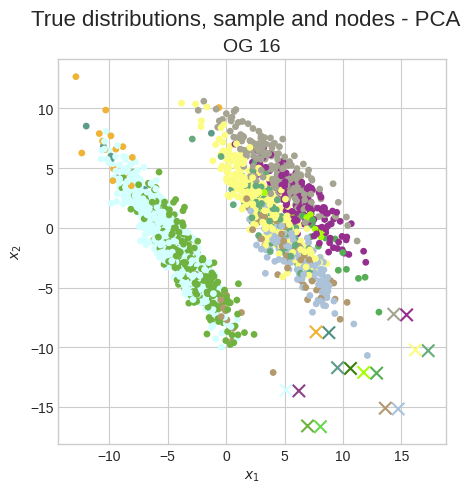

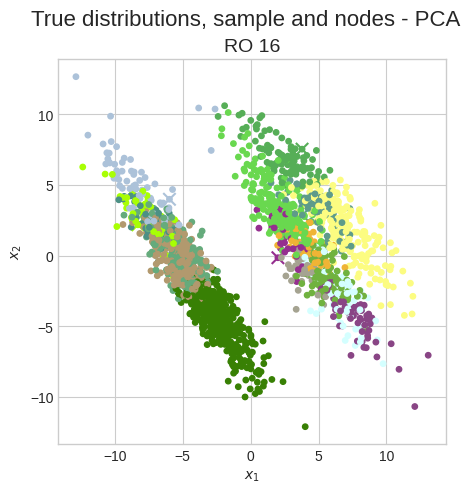

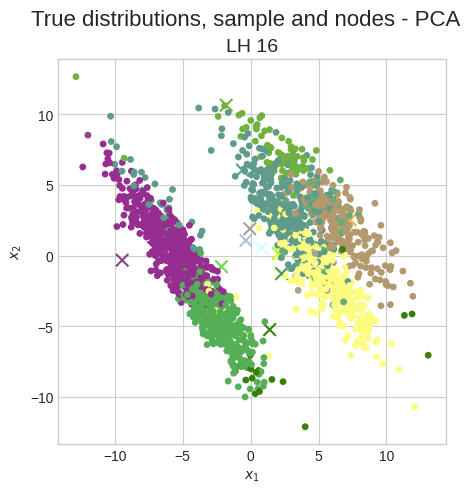

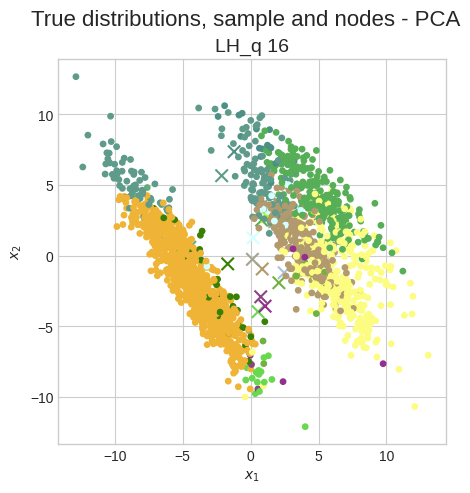

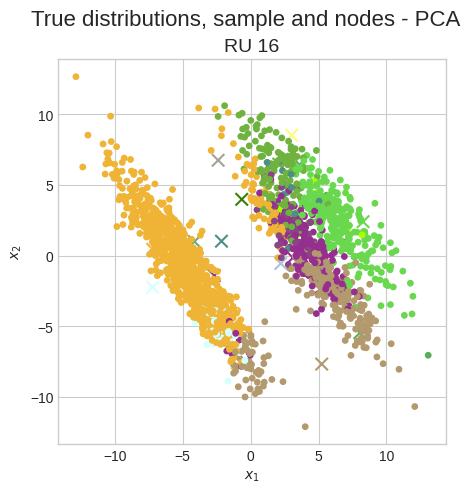

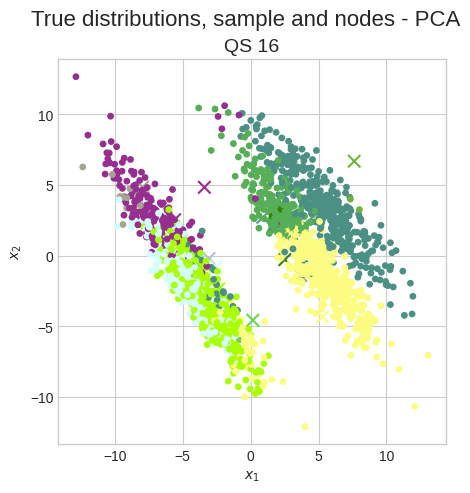

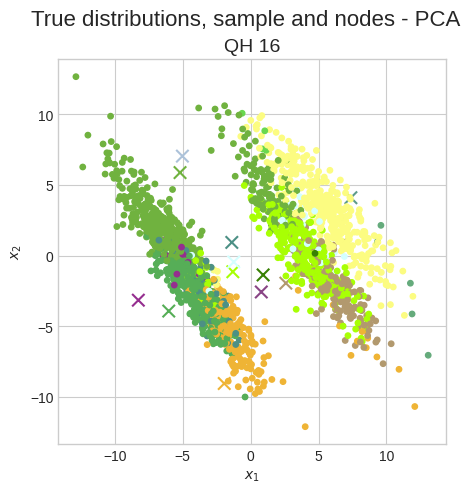

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


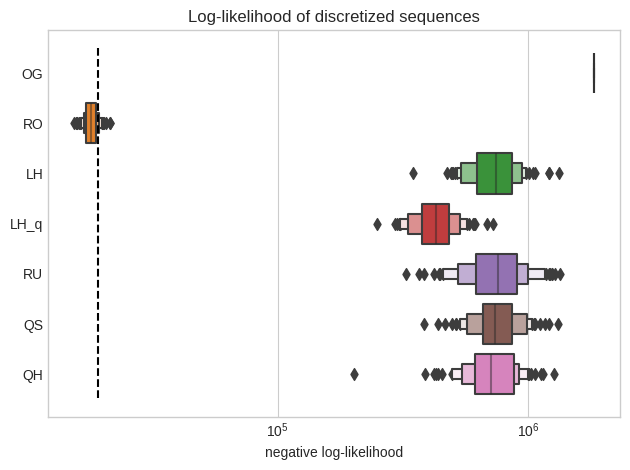

In [34]:
n=2**4
res=dd(list)

for discretize_meth in DISCRETIZATION_TECHNIQUES:
    for _ in range(100):
        # print(discretize_meth)
        model = init_model_with_params(discretize_meth, true_model, X, n=n)
        Xd = model.discretize(X, np.array([X.shape[0]]))
        Xd_c = model.nodes[:, Xd.reshape(-1)].T
        res[discretize_meth].append(true_model.score(Xd_c, np.array([X.shape[0]])))

    """
    Plot emission distribution and nodes
    """
    nodes = pca.transform(model.nodes.T)
    


    plt.figure(figsize=(5, 5))
    # for k in range(model.n_components):
    #     plt.contour(XX, YY, np.exp(lls[:, k]).reshape(XX.shape),
    #                 cmap=white_to_color_cmap(sns.xkcd_palette(['grey'])[0]), levels=6)

    plt.scatter(nodes[:, 0], nodes[:, 1], marker='x', s=80, color=[colors[i] for i in range(model.no_nodes)])
    plt.scatter(X2[:, 0], X2[:, 1], marker='o', s=15, color=[colors[i] for i in Xd.reshape(-1)], alpha=1)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$")
    plt.suptitle("True distributions, sample and nodes - PCA", size=16)
    if discretize_meth in title_strings.keys():
        plt.title(f"{title_strings[discretize_meth]} {n}", size=14)
    else:
        plt.title(f"{discretize_meth} {n}", size=14)
    plt.savefig(f'chapter4/10d_gaussianHmm_discrete_example_{discretize_meth}2**6.eps', format='eps')
    plt.show()
    plt.close()
    
results = (pd.DataFrame(res).rename(title_strings,  axis=1) * -1).melt(None, None, 'sample', 'value')
sns.boxenplot(results, x='value', y='sample')
plt.ylabel('')
plt.vlines(true_model.score(X)* (-1), -.5, 6.5, colors=['black'], linestyles='--')
plt.xlabel('negative log-likelihood')
plt.title('Log-likelihood of discretized sequences (16 discrete values)')
plt.xscale('log')
plt.tight_layout()
plt.savefig('chapter4/10d_gaussianHMM_example2**6.eps', format='eps')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


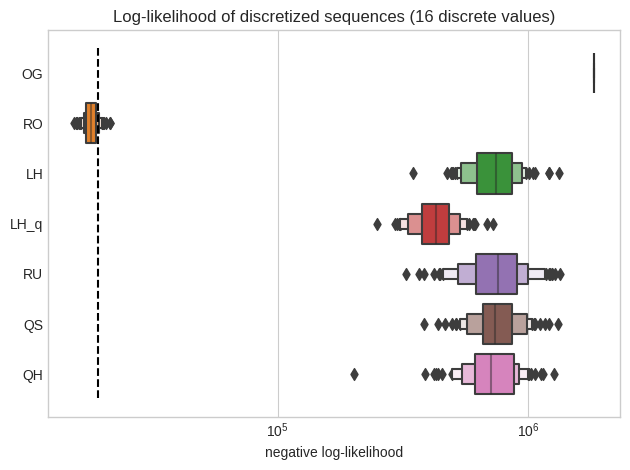

In [35]:
results = (pd.DataFrame(res).rename(title_strings,  axis=1) * -1).melt(None, None, 'sample', 'value')
sns.boxenplot(results, x='value', y='sample')
plt.ylabel('')
plt.vlines(true_model.score(X)* (-1), -.5, 6.5, colors=['black'], linestyles='--')
plt.xlabel('negative log-likelihood')
plt.title('Log-likelihood of discretized sequences (16 discrete values)')
plt.xscale('log')
plt.tight_layout()
plt.savefig('chapter4/10d_gaussianHMM_example2**6.eps', format='eps')
plt.show()